In [1]:
# Use autoreload to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import rootutils
root_path = rootutils.find_root()

In [3]:
import cubo
import lexcube
import xarray as xr

In [4]:
da = cubo.create(
    lat=51.4302985,
    lon=13.34200476,
    collection="sentinel-2-l2a",
    bands=["B04","B03","B02"],
    start_date="2025-01-01",
    end_date="2025-12-31",
    edge_size=250,
    resolution=10,
    query={"eo:cloud_cover": {"lt": 20}}
)

In [5]:
# Remove coordinates that can't be serialized to NetCDF
coords_to_drop = []
for coord_name, coord in da.coords.items():
    if coord.dtype == object:
        coords_to_drop.append(coord_name)
        
# Drop the problematic coordinates and save
da_clean = da.drop_vars(coords_to_drop)
da_clean.to_netcdf(root_path / "data" / "sentinel_example.nc")

In [6]:
da_clean = xr.open_dataarray(root_path / "data" / "sentinel_example.nc", chunks={})

In [7]:
da_clean

<xarray.DataArray 'sentinel-2-l2a' (time: 74, band: 3, y: 250, x: 250)> Size: 111MB
dask.array<open_dataset-sentinel-2-l2a, shape=(74, 3, 250, 250), dtype=float64, chunksize=(74, 3, 250, 250), chunktype=numpy.ndarray>
Coordinates: (12/43)
  * time                                     (time) datetime64[ns] 592B 2025-...
    id                                       (time) <U54 16kB dask.array<chunksize=(74,), meta=np.ndarray>
  * band                                     (band) <U3 36B 'B04' 'B03' 'B02'
  * x                                        (x) float64 2kB 3.835e+05 ... 3....
  * y                                        (y) float64 2kB 5.7e+06 ... 5.69...
    s2:high_proba_clouds_percentage          (time) float64 592B dask.array<chunksize=(74,), meta=np.ndarray>
    ...                                       ...
    gsd                                      float64 8B ...
    common_name                              (band) <U5 60B dask.array<chunksize=(3,), meta=np.ndarray>
    center_wavelength                        (band) float64 24B dask.array<chunksize=(3,), meta=np.ndarray>
    full_width_half_max                      (band) float64 24B dask.array<chunksize=(3,), meta=np.ndarray>
    epsg                                     int32 4B ...
    cubo:distance_from_center                (y, x) float64 500kB dask.array<chunksize=(250, 250), meta=np.ndarray>
Attributes:
    collection:           sentinel-2-l2a
    stac:                 https://planetarycomputer.microsoft.com/api/stac/v1
    epsg:                 32633
    resolution:           10
    edge_size:            250
    edge_size_m:          2500
    central_lat:          51.4302985
    central_lon:          13.34200476
    central_y:            5698981.481384516
    central_x:            384742.10774839745
    time_coverage_start:  2025-01-01
    time_coverage_end:    2025-12-31

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.0..10672.0].


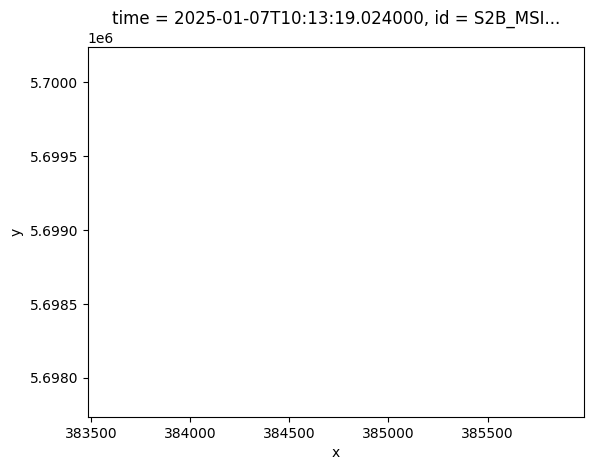

In [13]:
da.isel(time=0).plot.imshow()

In [8]:
def img_interactive(da):

    import ipywidgets as widgets
    import matplotlib.pyplot as plt

    def plot_time_step(time_index):
        plt.figure(figsize=(8, 8))
        da.isel(time=time_index).plot.imshow(robust=True)
        plt.title(f"{str(da.time.values[time_index])[:10]}")
        plt.axis('off')
        plt.show()

    widgets.interact(plot_time_step, time_index=widgets.IntSlider(min=0, max=len(da.time)-1, step=1, value=0))

In [9]:
img_interactive(da_clean)

interactive(children=(IntSlider(value=0, description='time_index', max=73), Output()), _dom_classes=('widget-i…